In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv('../datasets/CIFAR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('../datasets/CIFAR(Ass2&3)/test_data.csv')

In [12]:
train_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [13]:
test_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6


In [16]:
x_train = train_data.drop("label",axis=1)
x_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [15]:
x_test = test_data.drop("label",axis=1)
x_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
1,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
2,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
3,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
4,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117


In [17]:
y_train = train_data["label"]
y_train.head()

0    6
1    9
2    9
3    4
4    1
Name: label, dtype: int64

In [18]:
y_test = test_data["label"]
y_test.head()

0    3
1    8
2    8
3    0
4    6
Name: label, dtype: int64

In [19]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
x_train

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=int64)

In [22]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')/255.0
x_test = x_test.reshape(10000,32,32,3).astype('float32')/255.0
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0

In [23]:
model = Sequential()

In [24]:
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3440 - loss: 1.7717 - val_accuracy: 0.5545 - val_loss: 1.2549
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5711 - loss: 1.2092 - val_accuracy: 0.5964 - val_loss: 1.1287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.6338 - loss: 1.0363 - val_accuracy: 0.6308 - val_loss: 1.0478
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6761 - loss: 0.9230 - val_accuracy: 0.6761 - val_loss: 0.9320
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7109 - loss: 0.8330 - val_accuracy: 0.6779 - val_loss: 0.9309
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7264 - loss: 0.7793 - val_accuracy: 0.7028 - val_loss: 0.8749
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7468 - loss: 0.7296 - val_accuracy: 0.6982 - val_loss: 0.9116
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7595 -

In [28]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test loss: ',test_loss,'Test accuracy: ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.8533
Test loss:  0.8662793040275574 Test accuracy:  0.7056999802589417


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
frog


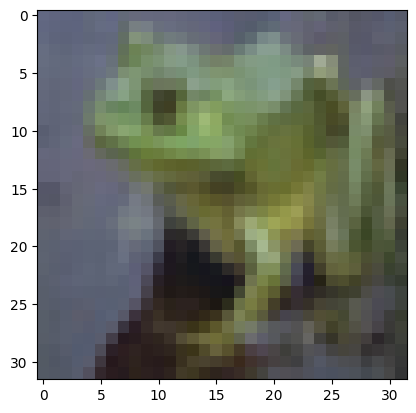

In [43]:
predictions = model.predict(x_test)
image_index = 8748
# print(np.argmax(y_test[image_index]))
# plt.figure(figsize=[5,5])
plt.imshow(x_test[image_index])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_names[np.argmax(predictions[image_index])])

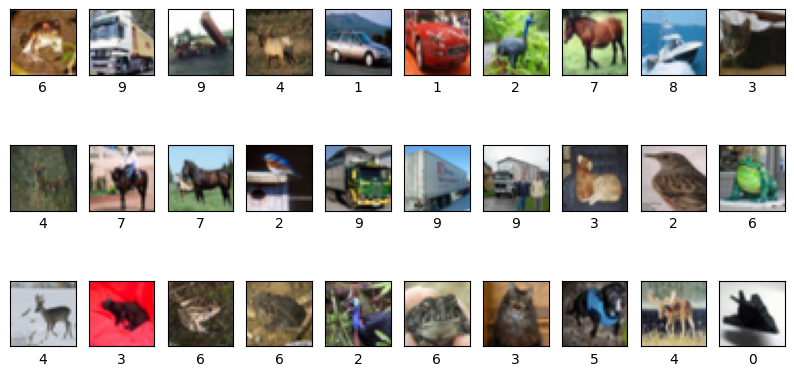

In [ ]:
plt.figure(figsize=[10,5])
for i in range (30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()